In [30]:
import scanpy as sc
import pandas as pd
import infercnvpy as cnv

import sys
import os 
sys.path.append(os.path.expanduser(f"~/SSS_mount/insituCNV/InSituCNV/modules"))
sys.path.append(os.path.expanduser(f"~/SSS_mount/insituCNV/InSituCNV"))
import infercnv_pipeline as ip
import insitucnv as icv

# snPATHO-seq CNV inference

## Read in data

In [31]:
adata = sc.read(os.path.expanduser(f"~/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/snPATHOseq/snPATHOseq_221.h5ad"))

In [32]:
adata

AnnData object with n_obs × n_vars = 2303 × 14151
    obs: 'pid', 'run', 'sid', 'sum', 'detected', 'subsets_mt_sum', 'subsets_mt_detected', 'subsets_mt_percent', 'total', 'sizeFactor', 'kid', 'decontX_contamination', 'decontX_clusters', 'sum.1', 'detected.1', 'subsets_mt_sum.1', 'subsets_mt_detected.1', 'subsets_mt_percent.1', 'total.1', 'scDblFinder.sample', 'scDblFinder.cluster', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.difficulty', 'scDblFinder.cxds_score', 'scDblFinder.mostLikelyOrigin', 'scDblFinder.originAmbiguous', 'lv1', 'barcode'
    var: 'ensembl_id', 'gene_symbol', 'subsets_mt', 'gene_id', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'X_name', 'lv1_colors', 'scDblFinder.stats', 'scDblFinder.threshold', 'sid_colors'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    layers: 'X', 'logcounts', 'raw'

In [33]:
adata = adata[~adata.obs['lv1'].isna()].copy()

In [34]:
adata

AnnData object with n_obs × n_vars = 2094 × 14151
    obs: 'pid', 'run', 'sid', 'sum', 'detected', 'subsets_mt_sum', 'subsets_mt_detected', 'subsets_mt_percent', 'total', 'sizeFactor', 'kid', 'decontX_contamination', 'decontX_clusters', 'sum.1', 'detected.1', 'subsets_mt_sum.1', 'subsets_mt_detected.1', 'subsets_mt_percent.1', 'total.1', 'scDblFinder.sample', 'scDblFinder.cluster', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.difficulty', 'scDblFinder.cxds_score', 'scDblFinder.mostLikelyOrigin', 'scDblFinder.originAmbiguous', 'lv1', 'barcode'
    var: 'ensembl_id', 'gene_symbol', 'subsets_mt', 'gene_id', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'X_name', 'lv1_colors', 'scDblFinder.stats', 'scDblFinder.threshold', 'sid_colors'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    layers: 'X', 'logcounts', 'raw'

In [35]:
adata.var.head()

,ensembl_id,gene_symbol,subsets_mt,gene_id,symbol,ensg,chromosome,start,end
SAMD11,ENSG00000187634,SAMD11,False,ENSG00000187634.12,SAMD11,ENSG00000187634.12,chr1,923928,944581
NOC2L,ENSG00000188976,NOC2L,False,ENSG00000188976.11,NOC2L,ENSG00000188976.11,chr1,944203,959309
KLHL17,ENSG00000187961,KLHL17,False,ENSG00000187961.14,KLHL17,ENSG00000187961.14,chr1,960584,965719
PLEKHN1,ENSG00000187583,PLEKHN1,False,ENSG00000187583.11,PLEKHN1,ENSG00000187583.11,chr1,966482,975865
HES4,ENSG00000188290,HES4,False,ENSG00000188290.10,HES4,ENSG00000188290.10,chr1,998962,1000172


In [36]:
adata.obs.head()

,pid,run,sid,sum,detected,subsets_mt_sum,subsets_mt_detected,subsets_mt_percent,total,sizeFactor,...,scDblFinder.cluster,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.difficulty,scDblFinder.cxds_score,scDblFinder.mostLikelyOrigin,scDblFinder.originAmbiguous,lv1,barcode
B1914093_B1-2.AAACAAGCAAAGCTCAAGTAGGCT-1,B1914093_B1-2,2,221,2631.0,1887,57.0,11,2.166477,2631.0,0.683345,...,3,singlet,0.098825,0.402034,0.180968,6.921320e-03,a+g,False,epi1,AAACAAGCAAAGCTCAAGTAGGCT-1
B1914093_B1-2.AAACAAGCATATAGGTAGTAGGCT-1,B1914093_B1-2,2,221,2593.0,1826,13.0,7,0.501350,2593.0,0.673475,...,3,singlet,0.098201,0.376216,0.077161,1.071891e-01,c+g,False,epi1,AAACAAGCATATAGGTAGTAGGCT-1
B1914093_B1-2.AAACCAATCATTTGCGAGTAGGCT-1,B1914093_B1-2,2,221,1066.0,812,16.0,6,1.500938,1066.0,0.276870,...,6,singlet,0.005375,0.406275,0.103162,2.968557e-33,a+s,False,PC_IgA,AAACCAATCATTTGCGAGTAGGCT-1
B1914093_B1-2.AAACGGGCAACCTGTTAGTAGGCT-1,B1914093_B1-2,2,221,602.0,533,7.0,3,1.162791,602.0,0.156356,...,1,singlet,0.002240,0.040851,0.131952,4.048098e-47,a+t,False,TC,AAACGGGCAACCTGTTAGTAGGCT-1
B1914093_B1-2.AAACGTTCAACAGCACAGTAGGCT-1,B1914093_B1-2,2,221,927.0,754,2.0,2,0.215750,927.0,0.240768,...,19,singlet,0.004989,0.169451,0.248040,4.216650e-32,g+q,False,fib2,AAACGTTCAACAGCACAGTAGGCT-1


In [37]:
# Subset to only contain the common genes across snPATHO-seq and CosMx for comparison
common_genes_df = pd.read_csv("221_common_genes.csv")
adata = adata[:, adata.var_names.isin(common_genes_df['common_genes'])].copy()

In [38]:
adata

AnnData object with n_obs × n_vars = 2094 × 14044
    obs: 'pid', 'run', 'sid', 'sum', 'detected', 'subsets_mt_sum', 'subsets_mt_detected', 'subsets_mt_percent', 'total', 'sizeFactor', 'kid', 'decontX_contamination', 'decontX_clusters', 'sum.1', 'detected.1', 'subsets_mt_sum.1', 'subsets_mt_detected.1', 'subsets_mt_percent.1', 'total.1', 'scDblFinder.sample', 'scDblFinder.cluster', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.difficulty', 'scDblFinder.cxds_score', 'scDblFinder.mostLikelyOrigin', 'scDblFinder.originAmbiguous', 'lv1', 'barcode'
    var: 'ensembl_id', 'gene_symbol', 'subsets_mt', 'gene_id', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'X_name', 'lv1_colors', 'scDblFinder.stats', 'scDblFinder.threshold', 'sid_colors'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    layers: 'X', 'logcounts', 'raw'

## Run smoothing, CNV inference and epithelial clustering

In [40]:
sid ='221'

In [41]:
# Compute neighbors
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=100)

In [46]:
# Normalize the raw counts
adata.X = adata.layers['raw'].copy()
sc.pp.normalize_total(adata)

# Apply smoothing on 100 nearest neighbors
adata.layers['raw'] = adata.X.copy()
icv.tl.smooth_data_for_cnv(adata, n_neighbors=100)

# Normalize and log-transform the smoothed data
adata.X = adata.layers['M'].copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

# Compute CNV inference using the non-epithelial cell types as reference and with a window-size of 100
cnv.tl.infercnv(adata, 
                reference_key = 'lv1',
                reference_cat = ['fib1', 'fib2', 'mast', 'mye1', 'mye2','BC', 'EC', 'PC_IgA', 'PC_IgG', 'PC_IgM', 'SMC', 'TC'],
                window_size=100)

  0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
adata

AnnData object with n_obs × n_vars = 2094 × 14044
    obs: 'pid', 'run', 'sid', 'sum', 'detected', 'subsets_mt_sum', 'subsets_mt_detected', 'subsets_mt_percent', 'total', 'sizeFactor', 'kid', 'decontX_contamination', 'decontX_clusters', 'sum.1', 'detected.1', 'subsets_mt_sum.1', 'subsets_mt_detected.1', 'subsets_mt_percent.1', 'total.1', 'scDblFinder.sample', 'scDblFinder.cluster', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.difficulty', 'scDblFinder.cxds_score', 'scDblFinder.mostLikelyOrigin', 'scDblFinder.originAmbiguous', 'lv1', 'barcode', 'epi_cnv_leiden_res0.1', 'epi_cnv_leiden_res0.3'
    var: 'ensembl_id', 'gene_symbol', 'subsets_mt', 'gene_id', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'X_name', 'lv1_colors', 'scDblFinder.stats', 'scDblFinder.threshold', 'sid_colors', 'log1p', 'pca', 'neighbors', 'cnv', 'dendrogram_epi_cnv_leiden_res0.1', 'epi_cnv_leiden_res0.1_colors', 'dendrogram_epi_cnv_leiden_res0.3', 'epi_cnv_leiden_res0.3_c

In [ ]:
# Select only the epithelial cells and compute dimentionality reduction and nearest neighbor graph based on their CNV profiles
adata_epi = adata[adata.obs.lv1.isin(['epi1', 'epi2', 'epi3', 'epi4'])].copy()
cnv.tl.pca(adata_epi)
cnv.pp.neighbors(adata_epi)

# Testing different resolutions
resolutions=[0.1, 0.175, 0.3]
for res in resolutions:    
    #Cluster only the epithelial cells
    key_added=f'epi_cnv_leiden_res{res}'
    cnv.tl.leiden(adata_epi, resolution=res, key_added=key_added)

    # Add the epithelial clustering back to the whole snPATHO-seq dataset
    adata.obs[key_added] = 'non-epi'
    adata.obs.loc[adata_epi.obs_names, key_added] = adata_epi.obs[key_added]
    adata.obs[key_added] = adata.obs[key_added].astype("category")

    # Plot the heatmaps
    sc.tl.dendrogram(adata, groupby=key_added)
    # save_heatmap = f"_snPATHOseq_{sid}_common_groupby-{key_added}.pdf"
    save_heatmap =None
    # sc.tl.dendrogram(adata, groupby=key_added, cor_method='pearson')
    cnv.pl.chromosome_heatmap(adata, groupby=key_added, dendrogram=True, save=save_heatmap)


## Save new adata object with CNV information

In [29]:
adata.write(os.path.expanduser(f"~/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/snPATHOseq/snPATHOseq_{sid}_common_CNVinf_fibref.h5ad"), compression ='gzip')

## Plot and save heatmap figure

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


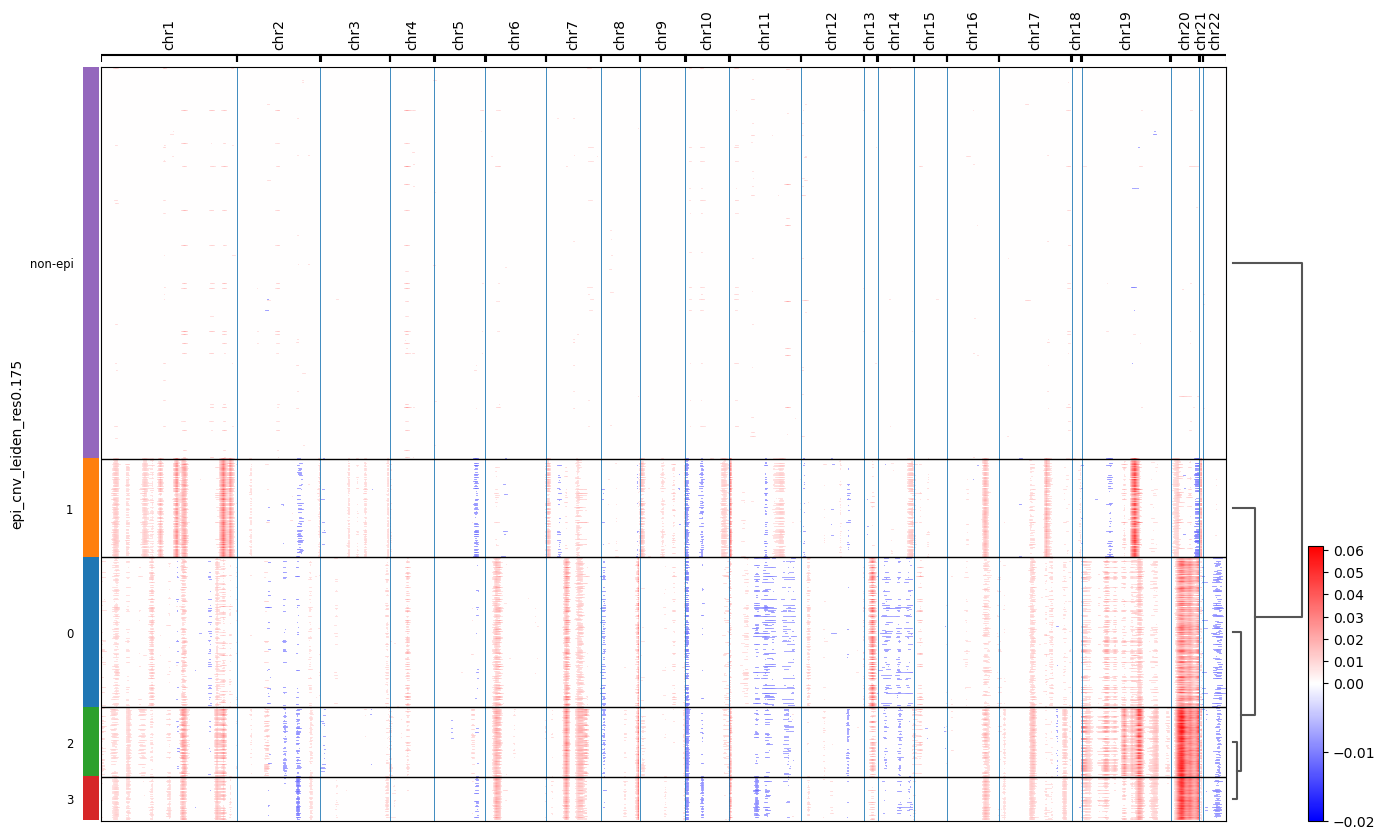

In [65]:
sid ='221'
groupby='epi_cnv_leiden_res0.175'
save_heatmap = f"_summary_snPATHOseq_{sid}_groupby-{groupby}.pdf"
# save_heatmap = None
cnv.pl.chromosome_heatmap(adata, groupby=groupby, dendrogram=True, save=save_heatmap, vmin=-.02)